<a href="https://colab.research.google.com/github/alejandroaviles/WL_MACSS-2023/blob/main/test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

In [2]:
!git clone https://github.com/alejandroaviles/WL_MACSS-2023.git

Cloning into 'WL_MACSS-2023'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 45 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (45/45), 12.89 MiB | 3.26 MiB/s, done.


In [3]:
os.chdir('WL_MACSS-2023')

In [4]:
!pip install treecorr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

import treecorr

In [6]:
# get the current working directory
current_working_directory = os.getcwd()
# print output to the console
print(current_working_directory)
file_exists = os.path.exists('gamma_A.0.fits')
print(file_exists)

/content/WL_MACSS-2023
True


In [7]:
filename='gamma_A.0.fits'
gammaA0 = fits.getdata(filename, ext=0)

print('file:',filename)
print('file shape is',gammaA0.shape)
length=gammaA0.shape[1]

file: gamma_A.0.fits
file shape is (1024, 1024, 2)


In [8]:
A0gamma1 = np.zeros(length*length);
A0gamma2 = np.zeros(length*length);
yT = np.zeros(length*length);
xT = np.zeros(length*length);

size_in_degrees=2;
tounits=size_in_degrees/length * np.pi/180;

print('lenght in degrees:',size_in_degrees)
print('conversion to units (rad):',tounits)


nn=0;
for jj in range(length):
    for ii in range(length):
        A0gamma1[nn] = gammaA0[jj,ii,0]
        A0gamma2[nn] = gammaA0[jj,ii,1]
        xT[nn] = ii*tounits
        yT[nn] = jj*tounits
        nn=nn+1

lenght in degrees: 2
conversion to units (rad): 3.408846195301425e-05


In [10]:
minArcmin=1.
maxArcmin=60.
minRad=minArcmin*np.pi/60/180
maxRad=maxArcmin*np.pi/60/180
print("minRad={:.5}, maxRad={:.5}".format(minRad,maxRad))
nbins=10

minRad=0.00029089, maxRad=0.017453


In [11]:
#cat=treecorr.Catalog(ra=xT,dec=yT,g1=A0gamma1,g2=A0gamma2,ra_units="rad",dec_units="rad")
cat=treecorr.Catalog(x=xT,y=yT,g1=A0gamma1,g2=A0gamma2,ra_units="rad",dec_units="rad")

In [12]:
GG=treecorr.GGCorrelation(min_sep=minRad,max_sep=maxRad,verbose=2,nbins=nbins)
#t1=time.perf_counter()
GG.process(cat)
#times[nSample]=round(time.perf_counter()-t1,ndigits=4)
#print(times)

nbins = 10, min,max sep = 0.000290888..0.0174533, bin_size = 0.409434


INFO:treecorr:nbins = 10, min,max sep = 0.000290888..0.0174533, bin_size = 0.409434


Starting process GG auto-correlations


INFO:treecorr:Starting process GG auto-correlations


Using 2 threads.


INFO:treecorr:Using 2 threads.


Building GField


INFO:treecorr:Building GField


Starting 256 jobs.


INFO:treecorr:Starting 256 jobs.


varg = 0.000354: sig_sn (per component) = 0.018827


INFO:treecorr:varg = 0.000354: sig_sn (per component) = 0.018827


In [13]:
nSample=len(nDec)
nSample

1048576

In [14]:
GG.__dict__

{'_corr': <cdata 'void *' 0x3965da0>,
 'config': {'min_sep': 0.0002908882086657216,
  'max_sep': 0.017453292519943292,
  'verbose': 2,
  'nbins': 10,
  'brute': False,
  'split_method': 'mean',
  'max_top': 10,
  'precision': 4,
  'pairwise': False,
  'm2_uform': 'Crittenden',
  'metric': 'Euclidean',
  'bin_type': 'Log',
  'var_method': 'shot',
  'num_bootstrap': 500},
 'logger': <Logger treecorr (INFO)>,
 '_ro': <treecorr.binnedcorr2.Namespace at 0x7fd88df2e380>,
 'coords': 'spherical',
 'metric': 'Euclidean',
 'results': {},
 'npatch1': 1,
 'npatch2': 1,
 '_rng': None,
 'xip': array([3.02705746e-04, 2.24346490e-04, 1.56495355e-04, 1.06561254e-04,
        7.00748474e-05, 4.30544304e-05, 2.97193077e-05, 1.58645462e-05,
        6.65257844e-06, 2.27045638e-07]),
 'xim': array([-1.16430411e-06, -2.24104022e-06, -3.15756928e-07, -3.85152523e-06,
        -1.30733706e-06, -2.19663037e-06,  8.84432198e-07,  1.93460409e-07,
        -3.77815101e-06, -4.14155611e-06]),
 'xip_im': array([ 1.2600

In [15]:
salida = np.zeros((len(GG.xip),4))  
#print(salida)              # Prints 

for ii in range(len(GG.xip)):
    salida[ii,0] = GG.meanr[ii]/np.pi*180*60
    salida[ii,1] = GG.xip[ii]
    salida[ii,2] = GG.xim[ii]
    salida[ii,3] = GG.npairs[ii]

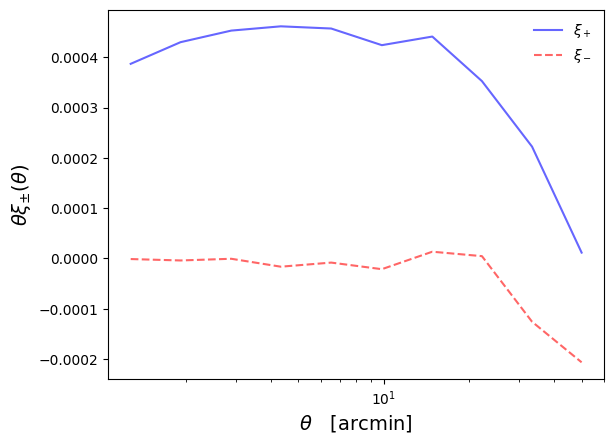

In [22]:
thtArr=np.array(GG.meanr)/np.pi*180*60#*tounit
#plt.figure(figsize=(10,8))
fig = plt.figure();
ax1 = fig.add_subplot(1, 1, 1)
#ax1.axis('equal')
#ax1.set_xscale('log')
ax1.set_xscale('log')
ax1.plot(thtArr,thtArr*GG.xip,linestyle="-",c="b",alpha=.6,label="$\\xi_+$")
ax1.plot(thtArr,thtArr*GG.xim,linestyle="--",c="r",alpha=.6,label="$\\xi_-$")
ax1.legend(frameon=False)
ax1.set_ylabel(r"$ \theta \xi_{\pm}(\theta) $", fontsize=14)
ax1.set_xlabel(r"$\theta  \quad $[arcmin]", fontsize=14)
#plt.title(prefix+"   points="+str(nSample))

plt.show()


# TEST download all sims

In [23]:
!gdown 1Tv7Q9lKa6ymUeWREcomDAO45EijLoM9P

Downloading...
From: https://drive.google.com/uc?id=1Tv7Q9lKa6ymUeWREcomDAO45EijLoM9P
To: /content/WL_MACSS-2023/MWhite_WL_sims.zip
100% 232M/232M [00:02<00:00, 93.5MB/s]


In [24]:
!unzip MWhite_WL_sims.zip

Archive:  MWhite_WL_sims.zip
   creating: sims/
  inflating: sims/gamma_B.4.fits     
  inflating: sims/kappa_B.1.fits     
  inflating: sims/gamma_A.4.fits     
  inflating: sims/kappa_A.8.fits     
  inflating: sims/gamma_A.3.fits     
  inflating: sims/gamma_A.7.fits     
  inflating: sims/kappa_A.5.fits     
  inflating: sims/kappa_B.2.fits     
  inflating: sims/gamma_B.3.fits     
  inflating: sims/kappa_B.5.fits     
   creating: sims/.ipynb_checkpoints/
  inflating: sims/.ipynb_checkpoints/0_README-checkpoint.txt  
  inflating: sims/gamma_A.8.fits     
  inflating: sims/kappa_A.7.fits     
  inflating: sims/gamma_B.9.fits     
  inflating: sims/kappa_A.0.fits     
  inflating: sims/gamma_B.7.fits     
  inflating: sims/kappa_B.6.fits     
  inflating: sims/gamma_B.1.fits     
  inflating: sims/gamma_B.0.fits     
  inflating: sims/kappa_A.2.fits     
  inflating: sims/kappa_A.4.fits     
  inflating: sims/gamma_A.9.fits     
  inflating: sims/gamma_B.2.fits     
  inflating: si